In [2]:
import jax
import jax.numpy as jnp
from interpolation import BarycentricInterpolation

import matplotlib.pyplot as plt

In [3]:
N = 50

interpolator1 = BarycentricInterpolation(N, 0, 10)
interpolator2 = BarycentricInterpolation(N, 0, 10)
collocation_nodes = interpolator1.nodes

In [4]:
omega = 1.0

x1_0 = 1.0
x2_0 = 0.0

x1_correct_coll = x1_0 * jnp.cos(omega * collocation_nodes) + (x2_0 / omega) * jnp.sin(omega * collocation_nodes)
x2_correct_coll = x2_0 * jnp.cos(omega * collocation_nodes) - x1_0 * omega * jnp.sin(omega * collocation_nodes)

t = jnp.linspace(0, 10, 100)

In [5]:
interpolator1.fit(x1_correct_coll)
x1_interpolatated = interpolator1.evaluate(t)

interpolator2.fit(x2_correct_coll)
x2_interpolatated = interpolator2.evaluate(t)

x1_correct = x1_0 * jnp.cos(omega * t) + (x2_0 / omega) * jnp.sin(omega * t)
x2_correct = x2_0 * jnp.cos(omega * t) - x1_0 * omega * jnp.sin(omega * t)

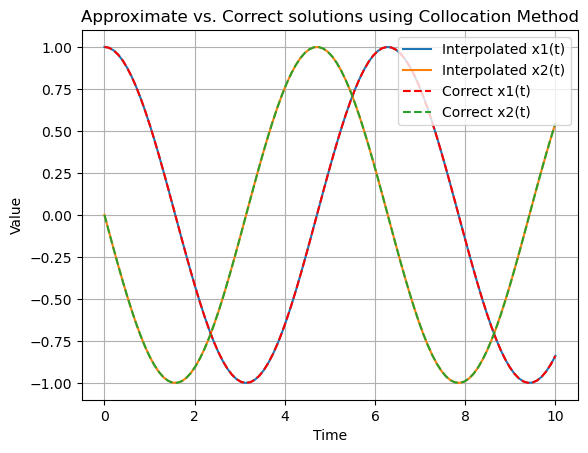

In [6]:
plt.plot(t, x1_interpolatated, label='Interpolated x1(t)')
plt.plot(t, x2_interpolatated, label='Interpolated x2(t)')
plt.plot(t, x1_correct, 'r--', label='Correct x1(t)')
plt.plot(t, x2_correct, '--', label='Correct x2(t)')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Approximate vs. Correct solutions using Collocation Method')
plt.grid(True)
plt.show()